In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Neural_Network(object):
    # init method will take care of instantiatng important constants and variables
    # lacing a "self." makes these values accessible to the whole class
    def __init__(self):
        # Our network has 2 inputs, 3 hidden units, and one output.
        # These are examples of hyperparameters--constants that establish the
        # structure and behavior of our network, but are not updated as we
        # train the network.
            # Ex: our learning algorithm is not capable of 
            # determining whether or not it needs another hidden unit;
            # this something we must decide on BEFORE training.
        
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # What neural networks do learn are the parameters-specifically
        # the weights on the parameters
        
        # Weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                 self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                 self.outputLayerSize)
        pass
        
    # We'll take care of moving our data through our network in
    # a method called forward
    
    def forward(self, X):
        # Propagate inputs through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
        
    def sigmoid(self, z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))

In [3]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [4]:
# Normalizing our data
X = X/np.max(X, axis=0)
y = y/100 #Max ttst score is 100

In [5]:
NN = Neural_Network()

In [6]:
yHat = NN.forward(X)

In [7]:
yHat

array([[0.17101514],
       [0.20384688],
       [0.1913257 ]])

In [8]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [9]:
import time

weightsToTry = np.linspace(-10, 10, 1000)
costs = np.zeros(1000)
startTime = time.process_time()

for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.process_time()

In [10]:
timeElapsed = endTime - startTime
timeElapsed

0.0625

Text(0.5, 0, 'Weights')

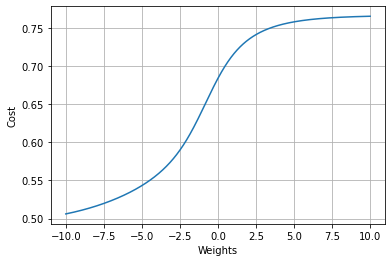

In [11]:
plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weights')

In [12]:
NN.W1[0,0] = 1.1
yHat = NN.forward(X)

In [13]:
sum(0.5*(y-yHat)**2)

array([0.71726455])

In [14]:
# Curse of dimensionality

weightsToTry = np.linspace(-10, 10, 1000)
costs = np.zeros((1000, 1000))

startTime = time.process_time()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,0] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.process_time()

In [15]:
timeElapsed = endTime - startTime
timeElapsed

33.171875